In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy as sps
from scipy import stats
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
def cond_semantica(condicao):
    if ('S' in condicao):
        return 'SC'
    elif ('A' in condicao):
        return 'SD'
    else:
        return condicao

In [3]:
def cond_sintatica(condicao):
    if ('CE' in condicao):
        return 'G/UG'
    elif ('EC' in condicao):
        return 'UG/G'
    else:
        return condicao

In [194]:
def trans_quantile(df, percentile):
    dfx = df.copy()
    for trecho in (['tempo2', 'tempo3', 'tempoper']):
        value = dfx[trecho].quantile(1-percentile/100)
        dfx.loc[dfx[trecho] > value, trecho] = np.NaN
    return dfx

def quantile(df, percentile):
    dfx = df.copy()
    for trecho in (['tempo2', 'tempo3', 'tempoper']):
        value = dfx[trecho].quantile(1-percentile/100)
        print(value)
        dfx.loc[dfx[trecho] > value, trecho] = np.NaN
    return dfx

In [182]:
def trans_participante(df):
    dfs = []
    for name, group in df.groupby('participant'):
        dfx = group
        for trecho in (['tempo2', 'tempo3', 'tempoper']):
            mean = dfx[trecho].mean()
            std =  dfx[trecho].std()
            dfx.loc[dfx[trecho] > mean+std, trecho] = np.NaN
        dfs.append(dfx)
    return pd.concat(dfs)

def std_parti(df):
    disf = trans_participante(df)
    return disf

In [6]:
l_sele = pd.read_csv('L_RT')

In [7]:
c_sele = pd.read_csv('C_RT')

In [8]:
l_sele['cond_sema'] = l_sele.condicao.apply(cond_semantica)
c_sele['cond_sema'] = c_sele.condicao.apply(cond_semantica)

In [9]:
l_sele['cond_sint'] = l_sele.condicao.apply(cond_sintatica)
c_sele['cond_sint'] = c_sele.condicao.apply(cond_sintatica)

In [10]:
c_sele = c_sele[(c_sele.cond_sint!='C') & (c_sele.cond_sint!='E')]

In [11]:
l_sele = l_sele[(l_sele.cond_sint!='C') & (l_sele.cond_sint!='E')]

In [12]:
c_sele['tempo2'] = c_sele['B.rt']
c_sele['tempo3'] = c_sele['C.rt']
c_sele['tempoper'] = c_sele['quest.rt']

In [13]:
c_sele.head()

,Unnamed: 0,Unnamed: 0.1,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency,cond_sintatica,cond_sema,cond_sint,tempo2,tempo3,tempoper
1,1,6,0.571800,0.749860,0.877190,0.794065,C_79,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.749860,0.877190,0.794065
2,2,13,3.457150,1.153485,1.316975,0.480495,C_118,n,A_EC,Gabriel_0311,1,UG/G,SD,UG/G,1.153485,1.316975,0.480495
5,5,23,1.018650,0.803085,1.674275,1.084595,C_32,n,S_EC,Gabriel_0311,1,UG/G,SC,UG/G,0.803085,1.674275,1.084595
7,7,35,0.843725,1.314415,0.615325,0.556670,C_27,n,A_CE,Gabriel_0311,1,G/UG,SD,G/UG,1.314415,0.615325,0.556670
8,8,36,0.734250,0.574995,0.486680,0.545415,C_43,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.574995,0.486680,0.545415


In [14]:
l_sele['tempo2'] = l_sele['B.rt']
l_sele['tempo3'] = l_sele['C.rt']
l_sele['tempoper'] = l_sele['quest.rt']

In [15]:
l_sele.head()

,Unnamed: 0,Unnamed: 0.1,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency,cond_sintatica,cond_sema,cond_sint,tempo2,tempo3,tempoper
1,1,8,0.139955,0.418205,0.876415,0.470995,L_93,n,A_CE,Rafael Abel F G dos Santos,1,G/UG,SD,G/UG,0.418205,0.876415,0.470995
3,3,12,0.160395,1.073420,0.445605,0.384060,L_76,n,A_EC,Rafael Abel F G dos Santos,1,UG/G,SD,UG/G,1.073420,0.445605,0.384060
4,4,13,0.886295,0.256525,0.588390,0.302605,L_28,n,A_EC,Rafael Abel F G dos Santos,1,UG/G,SD,UG/G,0.256525,0.588390,0.302605
5,5,14,0.567690,0.123190,0.685325,2.271780,L_98,n,S_EC,Rafael Abel F G dos Santos,1,UG/G,SC,UG/G,0.123190,0.685325,2.271780
6,6,16,NaN,0.416025,0.434370,0.989780,L_38,n,S_EC,Rafael Abel F G dos Santos,1,UG/G,SC,UG/G,0.416025,0.434370,0.989780


In [209]:
dfs_c = [c_sele, quantile(c_sele, 2), quantile(c_sele, 5), quantile(c_sele, 10), quantile(c_sele, 15), std_parti(c_sele)]
dfs_l = [l_sele, quantile(l_sele, 2), quantile(l_sele, 5), quantile(l_sele, 10), quantile(l_sele, 15), std_parti(l_sele)]

3.1711791999999996
2.9721458
10.238549200000024
2.383260849999131
2.4581984299959556
6.638632249999998
1.9475177599997793
1.9181052400024385
4.376152999999999
1.6696605
1.6361569999999996
3.2646014999999995
2.9281317999999996
3.035338599999996
8.066901199999998
2.257546
2.33921
6.240061500000001
1.8815680000000006
1.857633
4.482349000000005
1.5736419999999982
1.5483569999999995
3.5110859999999997


In [21]:
from scipy.stats import f_oneway

In [22]:
def plot_rt(df, title, savefig):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(9,5))
    conds = ['S_CE', 'S_EC', 'A_CE', 'A_EC']
    heights, yerr = [], []
    for cond in conds:
        heights.append(df[df.condicao==cond]['tempo2'].mean())
        yerr.append(sps.stats.sem(df[df.condicao==cond]['tempo2'].dropna().values))
    ax1.bar(['GRA / UNG', 'UNG / GRA', ' GRA / UNG ', ' UNG / GRA '], heights,yerr=yerr, capsize=10, color = ['tab:blue', 'tab:blue','tab:red', 'tab:red'], alpha =.93)
    ax1.set_title('Chunk 2', fontsize=15)
    ax1.set_ylabel('RT (s)', fontsize=13)
    ax1.set_ylim(0,1.5)
    heights, yerr = [], []
    for cond in conds:
        heights.append(df[df.condicao==cond]['tempo3'].mean())
        yerr.append(sps.stats.sem(df[df.condicao==cond]['tempo3'].dropna().values))
    ax2.bar(['GRA / UNG', 'UNG / GRA', ' GRA / UNG ', ' UNG / GRA '], heights,yerr=yerr, capsize=10, color = ['tab:blue', 'tab:blue','tab:red', 'tab:red'], alpha =.93)
    ax2.set_title('Chunk 3', fontsize=15)
    ax2.set_ylim(0,1.5)
    custom_lines = [Line2D([0], [0], color='tab:red', lw=4),
                    Line2D([0], [0], color='tab:blue', lw=4)]
    plt.legend(custom_lines, ['Dissonant\nmeaning', 'Consonant\nmeaning'], fontsize=12)
    ax2.get_yaxis().set_visible(False)
    if (savefig):
        plt.savefig('14mar/ANOVA_UNG_GRA'+title, facecolor='white')

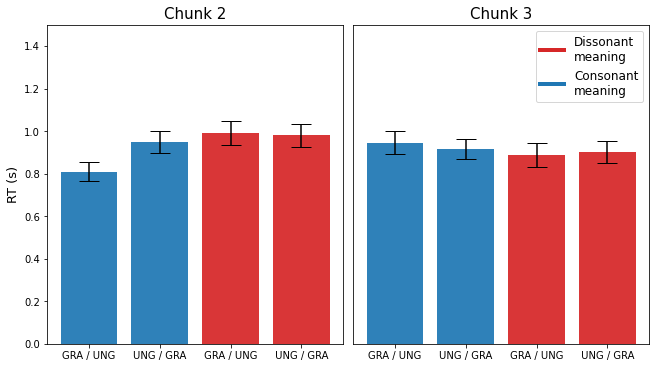

In [23]:
plot_rt(dfs_c[1], 'C_sele', True)

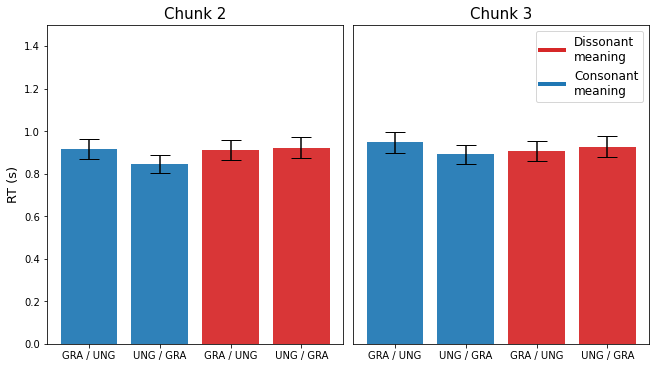

In [24]:
plot_rt(dfs_l[1], 'L_sele', True)

In [26]:
for df in dfs_c:
    print(f_oneway(df[df.condicao=='S_CE']['tempo2'].dropna(),df[df.condicao=='S_EC']['tempo2'].dropna(), \
        df[df.condicao=='A_CE']['tempo2'].dropna(), df[df.condicao=='A_EC']['tempo2'].dropna()))

F_onewayResult(statistic=0.6693643416223426, pvalue=0.571103075015359)
F_onewayResult(statistic=2.645799736111026, pvalue=0.04839377325258131)
F_onewayResult(statistic=3.682080444501333, pvalue=0.012038169918095656)
F_onewayResult(statistic=2.5287696259992214, pvalue=0.056614307200670844)
F_onewayResult(statistic=1.2492213131222119, pvalue=0.2913165443426897)
F_onewayResult(statistic=3.0955127328419367, pvalue=0.026689383171709102)


In [70]:
for df in dfs_l:
    print(f_oneway(df[df.condicao=='S_CE']['tempo2'].dropna(),df[df.condicao=='S_EC']['tempo2'].dropna(), \
        df[df.condicao=='A_CE']['tempo2'].dropna(), df[df.condicao=='A_EC']['tempo2'].dropna()))

F_onewayResult(statistic=0.784561248187713, pvalue=0.5028137187426518)
F_onewayResult(statistic=0.5680412621779436, pvalue=0.6362437609056975)
F_onewayResult(statistic=0.570747282392179, pvalue=0.6344525344277616)
F_onewayResult(statistic=0.19808304719662362, pvalue=0.897696740303466)
F_onewayResult(statistic=0.40983700449655086, pvalue=0.7460016511893253)
F_onewayResult(statistic=0.17501103587882771, pvalue=0.9133039716609511)


## Chunk 2

In [73]:
df

,Unnamed: 0,Unnamed: 0.1,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency,cond_sintatica,cond_sema,cond_sint,tempo2,tempo3,tempoper
92,92,6,0.869425,1.189720,2.114290,0.994065,C_79,n,S_CE,ANALUISA_0311,1,G/UG,SC,G/UG,NaN,NaN,0.994065
93,93,13,1.232370,0.869985,1.653845,0.704560,C_118,n,A_EC,ANALUISA_0311,1,UG/G,SD,UG/G,0.869985,NaN,0.704560
96,96,23,0.123010,0.686135,0.487690,3.033010,C_32,s,S_EC,ANALUISA_0311,1,UG/G,SC,UG/G,0.686135,0.487690,NaN
98,98,35,1.452350,0.683135,0.157455,0.416170,C_27,n,A_CE,ANALUISA_0311,1,G/UG,SD,G/UG,0.683135,0.157455,0.416170
99,99,36,0.686460,0.841445,0.354085,0.950035,C_43,s,S_CE,ANALUISA_0311,1,G/UG,SC,G/UG,0.841445,0.354085,0.950035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,21,1.306930,0.353115,1.867925,6.690800,C_104,s,S_EC,vinicius_1311,1,UG/G,SC,UG/G,0.353115,NaN,6.690800
383,383,25,0.296145,0.332760,1.001330,0.959430,C_51,n,A_CE,vinicius_1311,1,G/UG,SD,G/UG,0.332760,1.001330,0.959430
385,385,36,1.020645,0.968955,0.676795,1.077210,C_46,n,A_EC,vinicius_1311,1,UG/G,SD,UG/G,0.968955,0.676795,1.077210
386,386,37,0.590965,0.555465,0.000780,0.883280,C_4,n,A_EC,vinicius_1311,1,UG/G,SD,UG/G,0.555465,0.000780,0.883280


In [74]:
for df in dfs_c:
    model = ols('tempo3 ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=1))

                              df      sum_sq   mean_sq         F    PR(>F)
C(cond_sema)                 1.0    0.105184  0.105184  0.215670  0.642540
C(cond_sint)                 1.0    0.949764  0.949764  1.947396  0.163422
C(cond_sema):C(cond_sint)    1.0    0.048559  0.048559  0.099565  0.752470
Residual                   559.0  272.629881  0.487710       NaN       NaN
                              df      sum_sq   mean_sq         F    PR(>F)
C(cond_sema)                 1.0    0.167764  0.167764  0.450468  0.502396
C(cond_sint)                 1.0    0.012156  0.012156  0.032640  0.856697
C(cond_sema):C(cond_sint)    1.0    0.070269  0.070269  0.188682  0.664187
Residual                   547.0  203.714516  0.372421       NaN       NaN
                              df      sum_sq   mean_sq         F    PR(>F)
C(cond_sema)                 1.0    0.080624  0.080624  0.285500  0.593343
C(cond_sint)                 1.0    0.102958  0.102958  0.364584  0.546229
C(cond_sema):C(cond_sint)

In [29]:
for df in dfs_l:
    model = ols('tempo2 ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))

                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.287243    1.0  0.625187  0.429438
C(cond_sint)                 0.341369    1.0  0.742993  0.389048
C(cond_sema):C(cond_sint)    0.440914    1.0  0.959655  0.327668
Residual                   276.130054  601.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.182531    1.0  0.553717  0.457100
C(cond_sint)                 0.135728    1.0  0.411737  0.521339
C(cond_sema):C(cond_sint)    0.236881    1.0  0.718590  0.396952
Residual                   193.832591  588.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.136716    1.0  0.551844  0.457871
C(cond_sint)                 0.223651    1.0  0.902749  0.342448
C(cond_sema):C(cond_sint)    0.053627    1.0  0.216460  0.641929
Residual                   141.214337  570.0       NaN       NaN
                         

# Chunk 3

In [30]:
for df in dfs_c:
    model = ols('tempo3 ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))

                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.121421    1.0  0.248961  0.618004
C(cond_sint)                 0.949764    1.0  1.947396  0.163422
C(cond_sema):C(cond_sint)    0.048559    1.0  0.099565  0.752470
Residual                   272.629881  559.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.169870    1.0  0.456124  0.499726
C(cond_sint)                 0.012156    1.0  0.032640  0.856697
C(cond_sema):C(cond_sint)    0.070269    1.0  0.188682  0.664187
Residual                   203.714516  547.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.075129    1.0  0.266041  0.606215
C(cond_sint)                 0.102958    1.0  0.364584  0.546229
C(cond_sema):C(cond_sint)    0.000089    1.0  0.000316  0.985813
Residual                   149.670371  530.0       NaN       NaN
                         

In [31]:
for df in dfs_l:
    model = ols('tempo3 ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))

                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.005614    1.0  0.012673  0.910405
C(cond_sint)                 0.217757    1.0  0.491614  0.483480
C(cond_sema):C(cond_sint)    0.385500    1.0  0.870315  0.351243
Residual                   266.208891  601.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.001422    1.0  0.004400  0.947135
C(cond_sint)                 0.049448    1.0  0.153001  0.695826
C(cond_sema):C(cond_sint)    0.220406    1.0  0.681968  0.409245
Residual                   190.036067  588.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.068727    1.0  0.285289  0.593463
C(cond_sint)                 0.026383    1.0  0.109520  0.740813
C(cond_sema):C(cond_sint)    0.090845    1.0  0.377106  0.539401
Residual                   137.313784  570.0       NaN       NaN
                         

## Tempo per

In [32]:
for df in dfs_c:
    model = ols('tempoper ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))

                                sum_sq     df         F    PR(>F)
C(cond_sema)                  2.451611    1.0  0.489165  0.484586
C(cond_sint)                  1.074178    1.0  0.214328  0.643573
C(cond_sema):C(cond_sint)    14.957811    1.0  2.984500  0.084609
Residual                   2846.720553  568.0       NaN       NaN
                                sum_sq     df         F    PR(>F)
C(cond_sema)                  0.061115    1.0  0.020482  0.886250
C(cond_sint)                  0.005743    1.0  0.001925  0.965023
C(cond_sema):C(cond_sint)     4.874277    1.0  1.633594  0.201740
Residual                   1658.978935  556.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.002328    1.0  0.001385  0.970329
C(cond_sint)                 0.001377    1.0  0.000819  0.977181
C(cond_sema):C(cond_sint)    1.665521    1.0  0.990493  0.320068
Residual                   906.332248  539.0       NaN       NaN
               

In [33]:
for df in dfs_l:
    model = ols('tempoper ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))

                                sum_sq     df         F    PR(>F)
C(cond_sema)                  0.180620    1.0  0.047351  0.827810
C(cond_sint)                  5.451970    1.0  1.429297  0.232340
C(cond_sema):C(cond_sint)     1.403393    1.0  0.367916  0.544366
Residual                   2345.881780  615.0       NaN       NaN
                                sum_sq     df         F    PR(>F)
C(cond_sema)                  0.825931    1.0  0.333240  0.563973
C(cond_sint)                  0.533461    1.0  0.215236  0.642861
C(cond_sema):C(cond_sint)     8.468435    1.0  3.416774  0.065027
Residual                   1492.050202  602.0       NaN       NaN
                               sum_sq     df         F    PR(>F)
C(cond_sema)                 1.700615    1.0  1.012418  0.314741
C(cond_sint)                 0.040052    1.0  0.023844  0.877335
C(cond_sema):C(cond_sint)    1.361571    1.0  0.810577  0.368321
Residual                   980.976955  584.0       NaN       NaN
               

In [34]:
c_sele

,Unnamed: 0,Unnamed: 0.1,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency,cond_sintatica,cond_sema,cond_sint,tempo2,tempo3,tempoper
1,1,6,0.571800,0.749860,0.877190,0.794065,C_79,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.749860,0.877190,0.794065
2,2,13,3.457150,1.153485,1.316975,0.480495,C_118,n,A_EC,Gabriel_0311,1,UG/G,SD,UG/G,1.153485,1.316975,0.480495
5,5,23,1.018650,0.803085,1.674275,1.084595,C_32,n,S_EC,Gabriel_0311,1,UG/G,SC,UG/G,0.803085,1.674275,1.084595
7,7,35,0.843725,1.314415,0.615325,0.556670,C_27,n,A_CE,Gabriel_0311,1,G/UG,SD,G/UG,1.314415,0.615325,0.556670
8,8,36,0.734250,0.574995,0.486680,0.545415,C_43,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.574995,0.486680,0.545415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,860,36,0.224055,1.052440,0.118730,0.467705,C_45,s,A_CE,caique_001,1,G/UG,SD,G/UG,1.052440,0.118730,0.467705
861,861,37,0.091895,0.661135,0.285345,0.093940,C_3,n,A_CE,caique_001,1,G/UG,SD,G/UG,0.661135,0.285345,0.093940
862,862,38,0.518670,0.347560,1.978635,3.273370,C_76,n,A_EC,caique_001,1,UG/G,SD,UG/G,0.347560,1.978635,3.273370
863,863,40,0.178790,0.155890,0.277385,2.511420,C_92,n,S_EC,caique_001,1,UG/G,SC,UG/G,0.155890,0.277385,2.511420


In [86]:
def data_frame_frases(df, chunk):
    names, cond, b, c = [], [], [], []
    for name, group in df.groupby('frase'):
        names.append(name)
        cond.append(np.unique(group.condicao.values)[0])
        b.append(group[chunk+'.rt'].values)
       
    c_frases_b = pd.DataFrame(b)
    cond_sema = [num[:num.index('_')] for num in cond]
    cond_sint= [num[num.index('_')+1:] for num in cond]
    c_frases_b['cond_sint'] = cond_sint
    c_frases_b['cond_sema'] = cond_sema
    return c_frases_b

In [105]:
data_b = []
for name, group in c_sele.groupby('participant'):
    data_b.append([group[group.cond_sint=='G/UG']['B.rt'].mean(), \
                  group[group.cond_sint=='UG/G']['B.rt'].mean(),\
                   group[group.cond_sema=='SC']['B.rt'].mean(), \
                   group[group.cond_sema=='SD']['B.rt'].mean()])

In [220]:
def df_items(df, chunk):
    frase, cond_sint, cond_sema, b = [], [], [], []
    for name, group in df.groupby('frase'):
        frase.append(int(name[name.index('_')+1:]))
        b.append(group[chunk].mean())
    data_items = pd.DataFrame(data = {'frase':np.sort(frase), 'tempo':b}).sort_values(by='frase')
    
    cond_sint, cond_sema = [], []
    for frase in data_items.frase:
        cond_sint.append(df[df.frase=='L_'+str(frase)].cond_sint.values[0])
        cond_sema.append(df[df.frase=='L_'+str(frase)].cond_sema.values[0])
    data_items['cond_sint'] = cond_sint
    data_items['cond_sema'] = cond_sema
    
    return data_items

In [210]:
for df in dfs_c:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_items(df, 'tempo2')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.238755   1.0  2.186596  0.145750
C(cond_sint)               0.274866   1.0  2.517311  0.119169
C(cond_sema):C(cond_sint)  0.009725   1.0  0.089064  0.766659
Residual                   5.241128  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.215830   1.0  2.500493  0.120378
C(cond_sint)               0.156997   1.0  1.818886  0.183775
C(cond_sema):C(cond_sint)  0.153484   1.0  1.778186  0.188666
Residual                   4.143110  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.288185   1.0  5.121567  0.028191
C(cond_sint)               0.063848   1.0  1.134692  0.292106
C(cond_sema):C(cond_sint)  0.084212   1.0  1.496602  0.227167
Residual                   2.700910  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_s

3.1711791999999996
2.9721458
10.238549200000024
2.383260849999131
2.4581984299959556
6.638632249999998
1.9475177599997793
1.9181052400024385
4.376152999999999


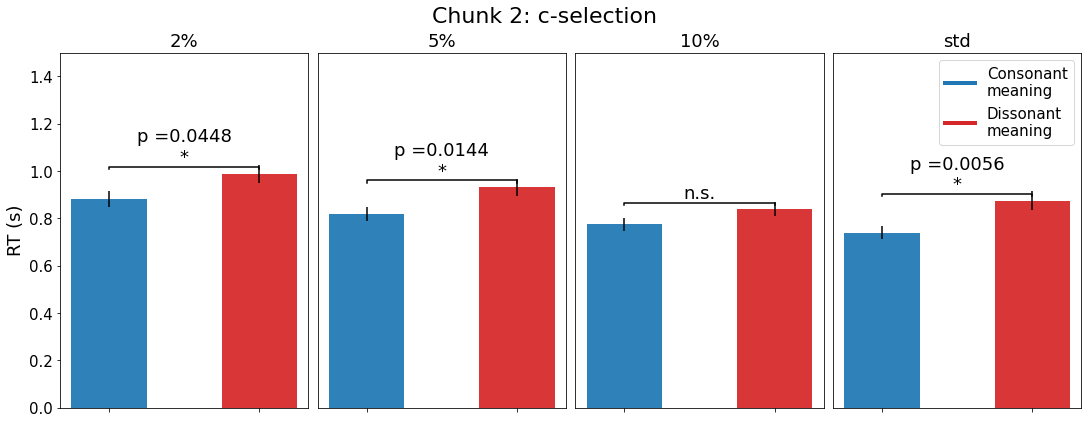

In [283]:
plot_rts_cond_trecho2(c_sele, 'out_26_c_sele.png', 'c-selection', True)

2.9281317999999996
3.035338599999996
8.066901199999998
2.257546
2.33921
6.240061500000001
1.8815680000000006
1.857633
4.482349000000005


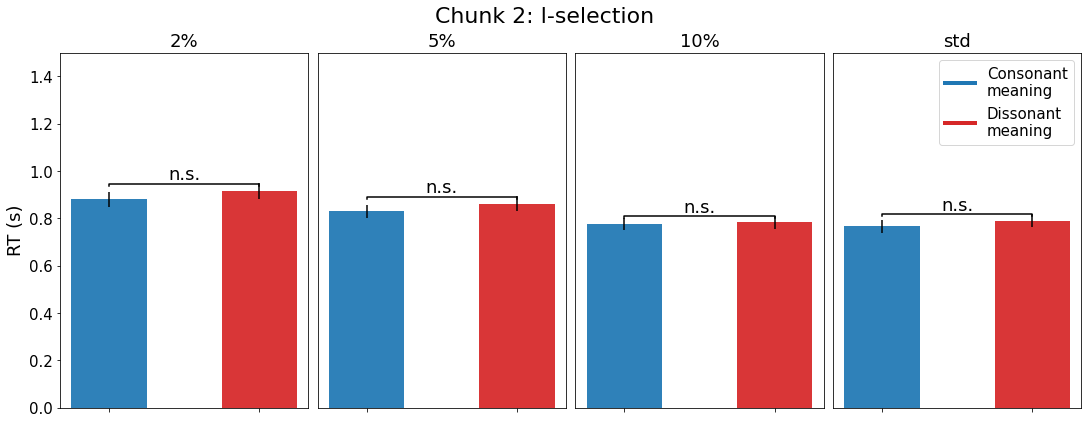

In [282]:
plot_rts_cond_trecho2(l_sele, 'out_26_l_sele', 'l-selection', True)

In [281]:
def plot_rts_cond_trecho2(df, name, title, savefig):
    fig2 = plt.figure(constrained_layout=True, figsize=(15,6))
    spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
    trecho = 'tempo2'
    dfs = [quantile(df, 2), \
           quantile(df, 5), \
           quantile(df, 10), \
          std_parti(df), \
          ]
    
    titles = ['2%', '5%','10%', 'std']
    conds = ['SC', 'SD']
    
    fig2.add_subplot(spec2[0, 0])
    heights, yerr = [], []
    dfx = dfs[0]
    for cond in conds:
        heights.append(dfx[dfx.cond_sema==cond][trecho].mean())
        yerr.append(sps.stats.sem(dfx[dfx.cond_sema==cond][trecho].dropna().values))
        #yerr.append(df[df.cond_semantica==cond][trecho].dropna().std())
        
    plt.bar(['', ' '], heights, color=['tab:blue', 'tab:red'], width=.5, alpha=.93, yerr=yerr)
    barplot_annotate_brackets(0, 1, stats.f_oneway(dfx[dfx.cond_sema=='SC'][trecho].dropna().values,\
                                                        dfx[dfx.cond_sema=='SD'][trecho].dropna().values)[1], np.array([0,1]), heights, fs=18)
        
    plt.title(titles[0], fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=15)
    plt.ylabel('RT (s)', fontsize=18)
    plt.ylim(0,1.5)
    
    fig2.add_subplot(spec2[0, 1])
    heights, yerr = [], []
    dfx = dfs[1]
    for cond in conds:
        heights.append(dfx[dfx.cond_sema==cond][trecho].mean())
        yerr.append(sps.stats.sem(dfx[dfx.cond_sema==cond][trecho].dropna().values))
        #yerr.append(df[df.cond_semantica==cond][trecho].dropna().std())
        
    plt.bar(['', ' '], heights, color=['tab:blue', 'tab:red'], width=.5, alpha=.93, yerr=yerr)
    barplot_annotate_brackets(0, 1, stats.f_oneway(dfx[dfx.cond_sema=='SC'][trecho].dropna().values,\
                                                        dfx[dfx.cond_sema=='SD'][trecho].dropna().values)[1], np.array([0,1]), heights, fs=18)
        
    plt.title(titles[1], fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks([])
    plt.ylim(0,1.5)
    
    fig2.add_subplot(spec2[0, 2])
    heights, yerr = [], []
    dfx = dfs[2]
    for cond in conds:
        heights.append(dfx[dfx.cond_sema==cond][trecho].mean())
        yerr.append(sps.stats.sem(dfx[dfx.cond_sema==cond][trecho].dropna().values))
        #yerr.append(df[df.cond_semantica==cond][trecho].dropna().std())
        
    plt.bar(['', ' '], heights, color=['tab:blue', 'tab:red'], width=.5, alpha=.93, yerr=yerr)
    barplot_annotate_brackets(0, 1, stats.f_oneway(dfx[dfx.cond_sema=='SC'][trecho].dropna().values,\
                                                        dfx[dfx.cond_sema=='SD'][trecho].dropna().values)[1], np.array([0,1]), heights, fs=18)
        
    plt.title(titles[2], fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks([])
    plt.ylim(0,1.5)

    fig2.add_subplot(spec2[0, 3])
    heights, yerr = [], []
    dfx = dfs[3]
    for cond in conds:
        heights.append(dfx[dfx.cond_sema==cond][trecho].mean())
        yerr.append(sps.stats.sem(dfx[dfx.cond_sema==cond][trecho].dropna().values))
        #yerr.append(df[df.cond_semantica==cond][trecho].dropna().std())
        
    plt.bar(['', ' '], heights, color=['tab:blue', 'tab:red'], width=.5, alpha=.93, yerr=yerr)
    barplot_annotate_brackets(0, 1, stats.f_oneway(dfx[dfx.cond_sema=='SC'][trecho].dropna().values,\
                                                        dfx[dfx.cond_sema=='SD'][trecho].dropna().values)[1], np.array([0,1]), heights, fs=18)
        
    plt.title(titles[3], fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks([])
    plt.ylim(0,1.5)
    custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]
    plt.legend(custom_lines, ['Consonant\nmeaning', 'Dissonant\nmeaning'], fontsize=15)
    #plt.setp(fig2.add_subplot(spec2[0, 3]).get_yticklabels(), visible=False)
    plt.suptitle('Chunk 2: '+title, fontsize=22)
    if (savefig):
        plt.savefig('14mar/'+name+'_Trecho2'+'.png', bbox_inches='tight')
    

In [228]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.02, barh=.01, fs=None, maxasterix=4):
    df = 16
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05
        if (np.round(data, 3) == 0.051):
            data = 0.05
        while data <= p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text ='n.s.'
    if (text!='n. s.'):
        if (len(text)==1):
            text='p ='+str(np.round(data, 4))+'\n'+text
        elif (len(text)==2):
            text='p ='+str(np.round(data, 4))+'\n'+text
        elif (len(text)==3):
            text='p < 0.0005'+str(np.round(data, 4))+text
        
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [221]:
for df in dfs_l:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_items(df, 'tempo2')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.050885   1.0  0.633963  0.429097
C(cond_sint)               0.102329   1.0  1.274883  0.263423
C(cond_sema):C(cond_sint)  0.001948   1.0  0.024272  0.876727
Residual                   4.735662  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.011808   1.0  0.219821  0.640904
C(cond_sint)               0.109268   1.0  2.034084  0.159077
C(cond_sema):C(cond_sint)  0.002364   1.0  0.044016  0.834546
Residual                   3.169397  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.010903   1.0  0.266803  0.607415
C(cond_sint)               0.064766   1.0  1.584850  0.213022
C(cond_sema):C(cond_sint)  0.083374   1.0  2.040207  0.158461
Residual                   2.411065  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_s

In [222]:
for df in dfs_l:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_items(df, 'tempo3')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.010170   1.0  0.131442  0.718237
C(cond_sint)               0.007529   1.0  0.097306  0.756187
C(cond_sema):C(cond_sint)  0.021492   1.0  0.277777  0.600138
Residual                   4.565005  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.035755   1.0  0.645960  0.424787
C(cond_sint)               0.013550   1.0  0.244800  0.622598
C(cond_sema):C(cond_sint)  0.001843   1.0  0.033301  0.855828
Residual                   3.265795  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.021951   1.0  0.533237  0.468139
C(cond_sint)               0.002547   1.0  0.061881  0.804410
C(cond_sema):C(cond_sint)  0.001270   1.0  0.030857  0.861162
Residual                   2.428777  59.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_s

In [208]:
len(dfs_c)

6

In [206]:
for df in dfs_c:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_items(df, 'tempo3')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.000306   1.0  0.003406  0.953704
C(cond_sint)               0.043511   1.0  0.484886  0.489576
C(cond_sema):C(cond_sint)  0.038931   1.0  0.433850  0.513253
Residual                   4.307242  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.001494   1.0  0.026063  0.872425
C(cond_sint)               0.000301   1.0  0.005251  0.942536
C(cond_sema):C(cond_sint)  0.052064   1.0  0.908148  0.345381
Residual                   2.751840  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_sema)               0.006891   1.0  0.143067  0.706919
C(cond_sint)               0.007237   1.0  0.150251  0.700009
C(cond_sema):C(cond_sint)  0.054670   1.0  1.135023  0.292036
Residual                   2.311999  48.0       NaN       NaN
                             sum_sq    df         F    PR(>F)
C(cond_s

In [140]:
c_sele

,Unnamed: 0,Unnamed: 0.1,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency,cond_sintatica,cond_sema,cond_sint,tempo2,tempo3,tempoper
1,1,6,0.571800,0.749860,0.877190,0.794065,C_79,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.749860,0.877190,0.794065
2,2,13,3.457150,1.153485,1.316975,0.480495,C_118,n,A_EC,Gabriel_0311,1,UG/G,SD,UG/G,1.153485,1.316975,0.480495
5,5,23,1.018650,0.803085,1.674275,1.084595,C_32,n,S_EC,Gabriel_0311,1,UG/G,SC,UG/G,0.803085,1.674275,1.084595
7,7,35,0.843725,1.314415,0.615325,0.556670,C_27,n,A_CE,Gabriel_0311,1,G/UG,SD,G/UG,1.314415,0.615325,0.556670
8,8,36,0.734250,0.574995,0.486680,0.545415,C_43,n,S_CE,Gabriel_0311,1,G/UG,SC,G/UG,0.574995,0.486680,0.545415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,860,36,0.224055,1.052440,0.118730,0.467705,C_45,s,A_CE,caique_001,1,G/UG,SD,G/UG,1.052440,0.118730,0.467705
861,861,37,0.091895,0.661135,0.285345,0.093940,C_3,n,A_CE,caique_001,1,G/UG,SD,G/UG,0.661135,0.285345,0.093940
862,862,38,0.518670,0.347560,1.978635,3.273370,C_76,n,A_EC,caique_001,1,UG/G,SD,UG/G,0.347560,1.978635,3.273370
863,863,40,0.178790,0.155890,0.277385,2.511420,C_92,n,S_EC,caique_001,1,UG/G,SC,UG/G,0.155890,0.277385,2.511420


In [204]:
def df_subjects(df, chunk):
    tempo, cond_sint, cond_sema = [], [], []
    for name, group in df.groupby('participant'):
        tempo.append(group[(group.cond_sint=='G/UG') & (group.cond_sema=='SC')][chunk].mean())
        tempo.append(group[(group.cond_sint=='UG/G') & (group.cond_sema=='SD')][chunk].mean())
        tempo.append(group[(group.cond_sint=='G/UG') & (group.cond_sema=='SD')][chunk].mean())
        tempo.append(group[(group.cond_sint=='UG/G') & (group.cond_sema=='SC')][chunk].mean())
        cond_sint.append(['G/UG', 'UG/G', 'G/UG', 'UG/G'])
        cond_sema.append(['SC', 'SD', 'SD', 'SC'])
    data_subje = pd.DataFrame(data = {'tempo':tempo, 'cond_sint':np.array(cond_sint).flatten(), 'cond_sema':np.array(cond_sema).flatten()})
    return data_subje

In [170]:
df_subjects(c_sele, 'B').head()

,tempo,cond_sint,cond_sema
0,0.783495,G/UG,SC
1,0.869985,UG/G,SD
2,0.683135,G/UG,SD
3,0.667645,UG/G,SC
4,0.593940,G/UG,SC


In [179]:
dfs_c[3]['B.rt'].mean()

0.9861263781525595

In [211]:
for df in dfs_c:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_subjects(df, 'tempo2')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                              sum_sq     df         F    PR(>F)
C(cond_sema)                0.012034    1.0  0.033572  0.854761
C(cond_sint)                0.238836    1.0  0.666278  0.415094
C(cond_sema):C(cond_sint)   0.014345    1.0  0.040018  0.841601
Residual                   93.917236  262.0       NaN       NaN
                              sum_sq     df         F    PR(>F)
C(cond_sema)                0.169658    1.0  0.620409  0.431613
C(cond_sint)                0.169056    1.0  0.618208  0.432430
C(cond_sema):C(cond_sint)   0.073511    1.0  0.268818  0.604567
Residual                   71.100084  260.0       NaN       NaN
                              sum_sq     df         F    PR(>F)
C(cond_sema)                0.340583    1.0  1.734799  0.188977
C(cond_sint)                0.302057    1.0  1.538561  0.215968
C(cond_sema):C(cond_sint)   0.216876    1.0  1.104683  0.294232
Residual                   50.259027  256.0       NaN       NaN
                              sum_sq    

In [207]:
for df in dfs_c:
    model = ols('tempo ~ C(cond_sema) + C(cond_sint) + C(cond_sema):C(cond_sint)', data=df_subjects(df, 'tempo3')).fit()
    print(sm.stats.anova_lm(model, typ=2))

                               sum_sq     df         F    PR(>F)
C(cond_sema)                 0.002910    1.0  0.007417  0.931435
C(cond_sint)                 0.073396    1.0  0.187093  0.665702
C(cond_sema):C(cond_sint)    0.019753    1.0  0.050353  0.822625
Residual                   103.174495  263.0       NaN       NaN
                              sum_sq     df         F    PR(>F)
C(cond_sema)                0.014485    1.0  0.047670  0.827340
C(cond_sint)                0.022695    1.0  0.074691  0.784843
C(cond_sema):C(cond_sint)   0.014840    1.0  0.048838  0.825271
Residual                   79.002105  260.0       NaN       NaN
                              sum_sq     df         F    PR(>F)
C(cond_sema)                0.003932    1.0  0.017905  0.893660
C(cond_sint)                0.273332    1.0  1.244561  0.265648
C(cond_sema):C(cond_sint)   0.018194    1.0  0.082843  0.773716
Residual                   55.783789  254.0       NaN       NaN
                              sum_s